In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Track data loading
import psutil
import time

# Save&Load results
import pickle

In [2]:
import networkx as nx

import pandas as pd
import seaborn as sns

# 1. Load Data

In [17]:
st = time.time()

with open("Graphs/G_filtered.gpickle", 'rb') as f:
    G_filtered = pickle.load(f)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 1.4521317919095358 mins
RAM memory % used: 64.0
RAM Used (GB): 255.744626688


In [18]:
def print_graph_info(G):
    print("Graph Type: ", type(G))
    print("Node Num: ", G.number_of_nodes())
    print("Edge Num: ", G.number_of_edges())
    print("Weight Sum: ", G.size(weight="weight"))

In [19]:
print_graph_info(G_filtered)

Graph Type:  <class 'networkx.classes.digraph.DiGraph'>
Node Num:  767553
Edge Num:  2165564
Weight Sum:  29991328.0


## 1.1. Subgraphs of different phases

Extract retweets during some specific period, and construct the corresponding retweet subgraph.

In [20]:
def get_temporal_subgraph(G, latest_start, earliest_end):
    
    subG = nx.DiGraph()
    
    node_timeStamps_dict = nx.get_node_attributes(G, "timeStamps")
    edge_timeStamps_dict = nx.get_edge_attributes(G, "timeStamps")
    
    for k,v in node_timeStamps_dict.items():
        index_mask = np.logical_and(v >= latest_start, v <= earliest_end)
        if np.sum(index_mask) > 0:
            subG.add_node(k, timeStamps = G.nodes[k]['timeStamps'][index_mask], 
                             followers = G.nodes[k]['followers'][index_mask],
                             friends = G.nodes[k]['friends'][index_mask],
                             bot = G.nodes[k]['bot'][index_mask],
                             verified = G.nodes[k]['verified'][index_mask])
            
    for k,v in edge_timeStamps_dict.items():
        index_mask = np.logical_and(v >= latest_start, v <= earliest_end)
        if np.sum(index_mask) > 0:
            subG.add_edge(k[0], k[1], weight = np.sum(index_mask),
                                      timeStamps = G.edges[k]['timeStamps'][index_mask], 
                                      newsCategories = G.edges[k]['newsCategories'][index_mask],
                                      newsCategoriesGeneralised = G.edges[k]['newsCategoriesGeneralised'][index_mask])
    
    return subG

In [21]:
from datetime import datetime

def cal_timestamps(date):
    
    start_timestamp = 1584482894
    
    # Define the start and end dates
    start_date = datetime.strptime('2020-03-17', '%Y-%m-%d')
    end_date = datetime.strptime(date, '%Y-%m-%d')

    # Calculate the difference in days
    difference_in_days = (end_date - start_date).days
    
    return start_timestamp + difference_in_days*24*60*60

- 5 months: 2020-11-17 to 2021-04-17

In [22]:
latest_start = cal_timestamps("2020-11-17")
earliest_end = cal_timestamps("2021-04-17")

In [23]:
latest_start, earliest_end

(1605650894, 1618697294)

In [24]:
st = time.time()

G_filtered_sub1 = get_temporal_subgraph(G_filtered, latest_start, earliest_end)
nx.write_gpickle(G_filtered_sub1, "Graphs/G_filtered_sub1.gpickle")

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 1.8217710693677267 mins
RAM memory % used: 64.3
RAM Used (GB): 256.883703808


In [25]:
nx.info(G_filtered_sub1), G_filtered_sub1.size(weight="weight")

('DiGraph with 589056 nodes and 1181826 edges', 5625119.0)

In [26]:
G_filtered_sub1.nodes[26]

{'timeStamps': array([1605672432, 1606289507, 1606521767, 1607032140, 1607063024,
        1607670568, 1607836752, 1607839129, 1607895469, 1607905374,
        1607906033, 1607973754, 1608190572, 1608231168, 1608355516,
        1608877286, 1610940635, 1612057318, 1613366818, 1613790610,
        1615276042, 1616051274, 1616535967]),
 'followers': array([2930, 2945, 2948, 2957, 2957, 2977, 2976, 2976, 2977, 2977, 2977,
        2978, 2988, 2988, 2991, 2986, 3003, 3016, 3042, 3041, 3065, 3073,
        3081]),
 'friends': array([5002, 5000, 4999, 4995, 4995, 4999, 5000, 5000, 4999, 4999, 4999,
        4996, 5001, 5001, 5000, 4989, 4999, 4996, 4997, 4999, 4993, 4990,
        4984]),
 'bot': array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0]),
 'verified': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0])}

In [27]:
G_filtered_sub1.edges[(26, 10628236)]

{'weight': 2,
 'timeStamps': array([1605672432, 1612057318]),
 'newsCategories': array([9, 3]),
 'newsCategoriesGeneralised': array([2, 0])}

- 5 months: 2021-11-17 to 2022-04-17

In [28]:
latest_start = cal_timestamps("2021-11-17")
earliest_end = cal_timestamps("2022-04-17")

In [29]:
st = time.time()

G_filtered_sub2 = get_temporal_subgraph(G_filtered, latest_start, earliest_end)
nx.write_gpickle(G_filtered_sub2, "Graphs/G_filtered_sub2.gpickle")

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 1.415327509244283 mins
RAM memory % used: 64.7
RAM Used (GB): 258.397155328


In [30]:
nx.info(G_filtered_sub2), G_filtered_sub2.size(weight="weight")

('DiGraph with 437991 nodes and 729156 edges', 2983210.0)

## 1.2. Users extreme

In [3]:
save_address = "Results/User_categories/Users_extreme.pkl"
with open(save_address, 'rb') as f: 
    scientificNodes_extreme, fakeNodes_extreme, uncertainNodes_extreme = pickle.load(f)

# 2. Bow-tie Decomposition

In [32]:
def get_subgraph_ofCategorisedRetweets(G, edge_stance, verbose = False):
    
    subG = nx.DiGraph()
    
    newsCategoriesGeneralised_dict = nx.get_edge_attributes(G, 'newsCategoriesGeneralised')
    
    for edge in list(G.edges):
        bool_arr = (newsCategoriesGeneralised_dict[edge] == edge_stance)
        if np.sum(bool_arr) > 0:
            subG.add_edge(edge[0], edge[1], weight = G.edges[edge]["weight"])
            
    if verbose:
        summary_info = [subG.number_of_nodes(), subG.number_of_edges(), subG.size(weight = "weight")]
        print(f"Node numbers: {summary_info[0]}; Edge numbers: {summary_info[1]}; Weight numbers: {summary_info[2]}")
    
    return subG

In [33]:
def get_bowtie_components(G, verbose = False):
    GT = nx.reverse(G, copy=True)   # All edge directions are reversed
    
    strongly_con_comp = list(nx.strongly_connected_components(G))
    strongly_con_comp = max(strongly_con_comp, key=len)
    
    S = strongly_con_comp   # list of SCC
    
    v_any = list(S)[0]   # an arbitrary node in SCC 
    DFS_G = set(nx.dfs_tree(G,v_any).nodes())   # the set of nodes that v_any can reach (depth-first-search)
    DFS_GT = set(nx.dfs_tree(GT,v_any).nodes()) # the set of nodes that can reach v_any (depth-first-search)
    OUT = DFS_G - S
    IN = DFS_GT - S
    V_rest = set(G.nodes()) - S - OUT - IN
    
    
    TUBES = set()
    INTENDRILS = set()
    OUTTENDRILS = set()
    OTHER = set()
    
    for v in V_rest:
        irv = len(IN & set(nx.dfs_tree(GT,v).nodes())) != 0
        vro = len(OUT & set(nx.dfs_tree(G,v).nodes())) != 0
        if irv and vro:
            TUBES.add(v)
        elif irv and not vro:
            INTENDRILS.add(v)
        elif not irv and vro:
            OUTTENDRILS.add(v)
        elif not irv and not vro:
            OTHER.add(v)
    
    bt_partition_list = [list(S), list(IN), list(OUT), list(TUBES), list(INTENDRILS), list(OUTTENDRILS), list(OTHER)]
            
    if verbose:
        all_nodes_num = G.number_of_nodes()
        bt_names_list = ['S', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
        for i in range(7):
            print(bt_names_list[i], end = "  ")
            print("Number:", len(bt_partition_list[i]), end = "  ")
            print("Percentage: {:.2f}%".format(len(bt_partition_list[i])/all_nodes_num * 100))
    
    return bt_partition_list

In [34]:
def get_weightCount_between_twoListOfNodes(G, l1, l2):
    
    l1_outEdges = list(G.out_edges(l1))
    l2_inEdges = list(G.in_edges(l2))

    # Finding intersection
    intersect = list(set(l1_outEdges) &  set(l2_inEdges))
    weight_arr = np.array([G.edges[edge]["weight"] for edge in intersect])
    
    return np.sum(weight_arr)

In [35]:
def get_weightCount_acrossAllBTPartition(G, bt_list, verbose = False):
    
    all_weight_count = G.size(weight = "weight")
    bt_names_list = ['S', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
    
    weightCount_matrix = np.zeros((7,7), dtype = int)
    weightPercent_matrix = np.zeros((7,7))
    
    for i in range(7):
        for j in range(7):
            weightCount = get_weightCount_between_twoListOfNodes(G, bt_list[i], bt_list[j])
            weightCount_matrix[i, j] = weightCount
            
            weightPercent = weightCount/all_weight_count
            weightPercent_matrix[i, j] = weightPercent
            
    if verbose:
        print("Weight count: ")
        print(weightCount_matrix)
        print("Weight percentage: ")
        print(np.round(weightPercent_matrix * 100, 2))
    
    return weightPercent_matrix

In [36]:
def get_all_BTResults_ofCategorisedRetweets(G, edge_stance, verbose = True):
    subG = get_subgraph_ofCategorisedRetweets(G, edge_stance, verbose = verbose)
    print("===========")
    bt_list = get_bowtie_components(subG, verbose = verbose)
    print("===========")
    weightPercent_matrix = get_weightCount_acrossAllBTPartition(subG, bt_list, verbose = verbose)
    
    return bt_list, weightPercent_matrix

In [37]:
colour_palette = {"scientific":"#2a9d8f", "fake":"#e76f51", "uncertain":"#e9c46a"}

In [38]:
from matplotlib.colors import LogNorm

def plot_weightPercent_matrix(weightPercent_matrix, color, save = None):
    fig, axs = plt.subplots(figsize = (6,5), constrained_layout = True)
    
    ax = sns.heatmap(weightPercent_matrix*100, annot=True, fmt=".2f", cmap = sns.light_palette(color, as_cmap=True), norm = LogNorm(), annot_kws={'size': 12}, cbar_kws={'label': 'Percentage of retweets (%)'})
    ax.collections[0].set_clim(np.min((weightPercent_matrix*100)[weightPercent_matrix>0]),np.max(weightPercent_matrix*100)) 
    ax.figure.axes[-1].yaxis.label.set_size(15)
    ax.figure.axes[-1].tick_params(labelsize = 15)

    ax.set_xticklabels(['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS'], rotation = 45, fontsize = 12)
    ax.set_yticklabels(['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS'], rotation = 45, fontsize = 12)
    
    if save:
        fig.savefig(save, dpi=400)

## 2.1. Entire timeframe

In [39]:
scientific_bt_list, scientific_weightPercent_matrix = get_all_BTResults_ofCategorisedRetweets(G_filtered, edge_stance = 0)

Node numbers: 514410; Edge numbers: 1396550; Weight numbers: 18874451.0
S  Number: 7191  Percentage: 1.40%
IN  Number: 171008  Percentage: 33.24%
OUT  Number: 10278  Percentage: 2.00%
TUBES  Number: 5022  Percentage: 0.98%
INTENDRILS  Number: 23949  Percentage: 4.66%
OUTTENDRILS  Number: 230126  Percentage: 44.74%
OTHERS  Number: 66836  Percentage: 12.99%
Weight count: 
[[ 667550       0  428085       0       0       0       0]
 [4430501  561428 6446771  136963  605054       0       0]
 [      0       0  194191       0       0       0       0]
 [      0       0   97427   45473   13245       0       0]
 [      0       0       0       0  118450       0       0]
 [      0       0 3841554   97760  195344   95953   61987]
 [      0       0       0       0  410026       0  426689]]
Weight percentage: 
[[ 3.54  0.    2.27  0.    0.    0.    0.  ]
 [23.47  2.97 34.16  0.73  3.21  0.    0.  ]
 [ 0.    0.    1.03  0.    0.    0.    0.  ]
 [ 0.    0.    0.52  0.24  0.07  0.    0.  ]
 [ 0.    0.  

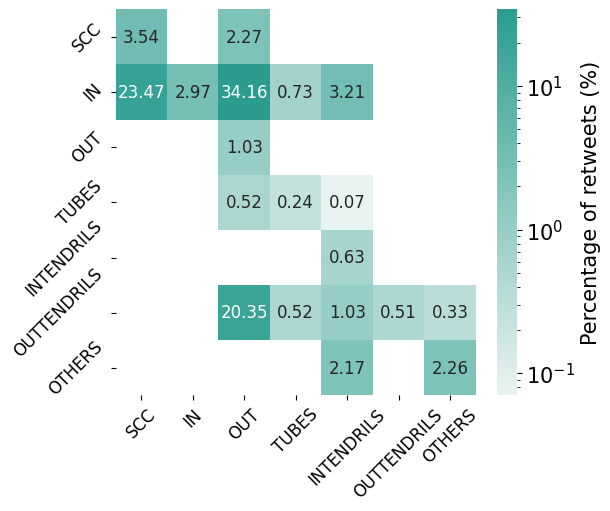

In [40]:
plot_weightPercent_matrix(scientific_weightPercent_matrix, color = colour_palette["scientific"], save = "Figures/Fig3a")

In [41]:
fake_bt_list, fake_weightPercent_matrix = get_all_BTResults_ofCategorisedRetweets(G_filtered, edge_stance = 1)

Node numbers: 237238; Edge numbers: 544077; Weight numbers: 7681791.0
S  Number: 1792  Percentage: 0.76%
IN  Number: 49687  Percentage: 20.94%
OUT  Number: 2386  Percentage: 1.01%
TUBES  Number: 2007  Percentage: 0.85%
INTENDRILS  Number: 6549  Percentage: 2.76%
OUTTENDRILS  Number: 125388  Percentage: 52.85%
OTHERS  Number: 49429  Percentage: 20.84%
Weight count: 
[[ 171770       0   97053       0       0       0       0]
 [1063365  204171 1897768   67121  189655       0       0]
 [      0       0   64929       0       0       0       0]
 [      0       0   47254   27751    5655       0       0]
 [      0       0       0       0   54371       0       0]
 [      0       0 2313467   62507  184879  112543   70767]
 [      0       0       0       0  531164       0  515601]]
Weight percentage: 
[[ 2.24  0.    1.26  0.    0.    0.    0.  ]
 [13.84  2.66 24.7   0.87  2.47  0.    0.  ]
 [ 0.    0.    0.85  0.    0.    0.    0.  ]
 [ 0.    0.    0.62  0.36  0.07  0.    0.  ]
 [ 0.    0.    0. 

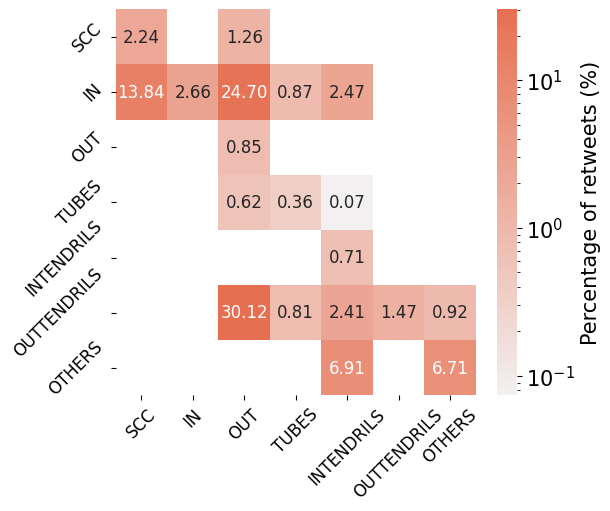

In [42]:
plot_weightPercent_matrix(fake_weightPercent_matrix, color = colour_palette["fake"], save = "Figures/Fig3b")

In [43]:
uncertain_bt_list, uncertain_weightPercent_matrix = get_all_BTResults_ofCategorisedRetweets(G_filtered, edge_stance = 2)

Node numbers: 674234; Edge numbers: 1804286; Weight numbers: 25211199.0
S  Number: 8459  Percentage: 1.25%
IN  Number: 195323  Percentage: 28.97%
OUT  Number: 13849  Percentage: 2.05%
TUBES  Number: 6264  Percentage: 0.93%
INTENDRILS  Number: 32451  Percentage: 4.81%
OUTTENDRILS  Number: 296113  Percentage: 43.92%
OTHERS  Number: 121775  Percentage: 18.06%
Weight count: 
[[ 828158       0  534294       0       0       0       0]
 [5064736  599830 8072287  155293  877010       0       0]
 [      0       0  341731       0       0       0       0]
 [      0       0  170034   89408   23126       0       0]
 [      0       0       0       0  303304       0       0]
 [      0       0 5584627  141378  430862  133343  117922]
 [      0       0       0       0  795331       0  948525]]
Weight percentage: 
[[ 3.28  0.    2.12  0.    0.    0.    0.  ]
 [20.09  2.38 32.02  0.62  3.48  0.    0.  ]
 [ 0.    0.    1.36  0.    0.    0.    0.  ]
 [ 0.    0.    0.67  0.35  0.09  0.    0.  ]
 [ 0.    0. 

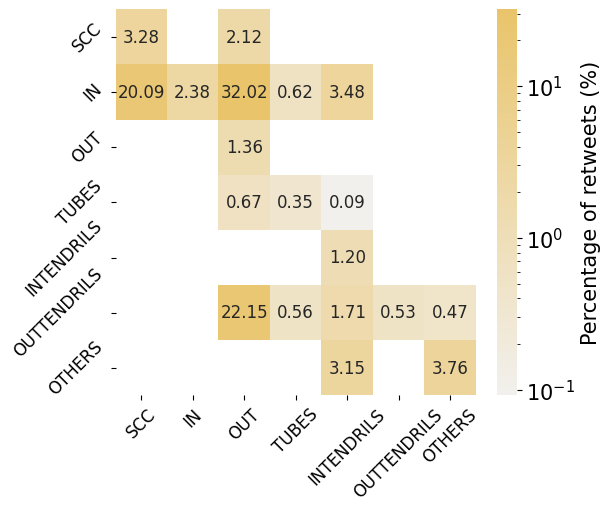

In [44]:
plot_weightPercent_matrix(uncertain_weightPercent_matrix, color = colour_palette["uncertain"], save = "Figures/Fig3c")

- Extreme nodes

In [45]:
def get_node_bowtie_role(bt_list, nodes, verbose = True):
    
    bt_values_list = ['S', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
    
    results = []
    for i in range(7):
        intersect = np.intersect1d(bt_list[i], nodes)
        results.append(intersect)
        
        if verbose:
            print(bt_values_list[i], end = "  ")
            print("Number:", len(intersect), end = "  ")
            print("Percentage: {:.2f}%".format(len(intersect)/len(bt_list[i]) * 100))
    
    return results

In [46]:
get_node_bowtie_role(scientific_bt_list, scientificNodes_extreme, verbose = True);

S  Number: 189  Percentage: 2.63%
IN  Number: 10890  Percentage: 6.37%
OUT  Number: 1406  Percentage: 13.68%
TUBES  Number: 254  Percentage: 5.06%
INTENDRILS  Number: 2153  Percentage: 8.99%
OUTTENDRILS  Number: 52005  Percentage: 22.60%
OTHERS  Number: 6151  Percentage: 9.20%


In [47]:
get_node_bowtie_role(fake_bt_list, fakeNodes_extreme, verbose = True);

S  Number: 1  Percentage: 0.06%
IN  Number: 301  Percentage: 0.61%
OUT  Number: 74  Percentage: 3.10%
TUBES  Number: 2  Percentage: 0.10%
INTENDRILS  Number: 195  Percentage: 2.98%
OUTTENDRILS  Number: 8760  Percentage: 6.99%
OTHERS  Number: 9703  Percentage: 19.63%


In [48]:
get_node_bowtie_role(uncertain_bt_list, uncertainNodes_extreme, verbose = True);

S  Number: 228  Percentage: 2.70%
IN  Number: 15362  Percentage: 7.86%
OUT  Number: 4106  Percentage: 29.65%
TUBES  Number: 665  Percentage: 10.62%
INTENDRILS  Number: 11308  Percentage: 34.85%
OUTTENDRILS  Number: 111051  Percentage: 37.50%
OTHERS  Number: 66086  Percentage: 54.27%


## 2.2. Temporal variations

### 2.2.1. 5 months: 2020-11-17 to 2021-04-17

In [49]:
scientific_bt_list1, scientific_weightPercent_matrix1 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub1, edge_stance = 0)

Node numbers: 257664; Edge numbers: 586058; Weight numbers: 3003412.0
S  Number: 1813  Percentage: 0.70%
IN  Number: 63865  Percentage: 24.79%
OUT  Number: 4015  Percentage: 1.56%
TUBES  Number: 2886  Percentage: 1.12%
INTENDRILS  Number: 12606  Percentage: 4.89%
OUTTENDRILS  Number: 120981  Percentage: 46.95%
OTHERS  Number: 51498  Percentage: 19.99%
Weight count: 
[[ 47082      0  41748      0      0      0      0]
 [412034 109951 913568  34767 152675      0      0]
 [     0      0  32324      0      0      0      0]
 [     0      0  22234   7655   4360      0      0]
 [     0      0      0      0  28838      0      0]
 [     0      0 768241  34254  86999  26620  19118]
 [     0      0      0      0 146040      0 114904]]
Weight percentage: 
[[ 1.57  0.    1.39  0.    0.    0.    0.  ]
 [13.72  3.66 30.42  1.16  5.08  0.    0.  ]
 [ 0.    0.    1.08  0.    0.    0.    0.  ]
 [ 0.    0.    0.74  0.25  0.15  0.    0.  ]
 [ 0.    0.    0.    0.    0.96  0.    0.  ]
 [ 0.    0.   25.58  

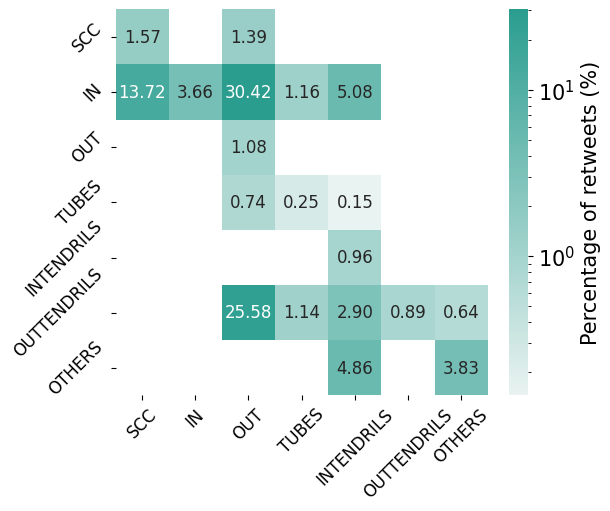

In [50]:
plot_weightPercent_matrix(scientific_weightPercent_matrix1, color = colour_palette["scientific"], save = "Figures/Fig3a1")

In [51]:
fake_bt_list1, fake_weightPercent_matrix1 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub1, edge_stance = 1)

Node numbers: 90220; Edge numbers: 153642; Weight numbers: 969530.0
S  Number: 119  Percentage: 0.13%
IN  Number: 4728  Percentage: 5.24%
OUT  Number: 539  Percentage: 0.60%
TUBES  Number: 596  Percentage: 0.66%
INTENDRILS  Number: 1483  Percentage: 1.64%
OUTTENDRILS  Number: 49972  Percentage: 55.39%
OTHERS  Number: 32783  Percentage: 36.34%
Weight count: 
[[  6052      0   2977      0      0      0      0]
 [ 33699  15392  67371   8250  15460      0      0]
 [     0      0   9006      0      0      0      0]
 [     0      0   6258   6467   1685      0      0]
 [     0      0      0      0   8155      0      0]
 [     0      0 375593  43659  56977  24906  18015]
 [     0      0      0      0 150425      0 119183]]
Weight percentage: 
[[ 0.62  0.    0.31  0.    0.    0.    0.  ]
 [ 3.48  1.59  6.95  0.85  1.59  0.    0.  ]
 [ 0.    0.    0.93  0.    0.    0.    0.  ]
 [ 0.    0.    0.65  0.67  0.17  0.    0.  ]
 [ 0.    0.    0.    0.    0.84  0.    0.  ]
 [ 0.    0.   38.74  4.5   5.8

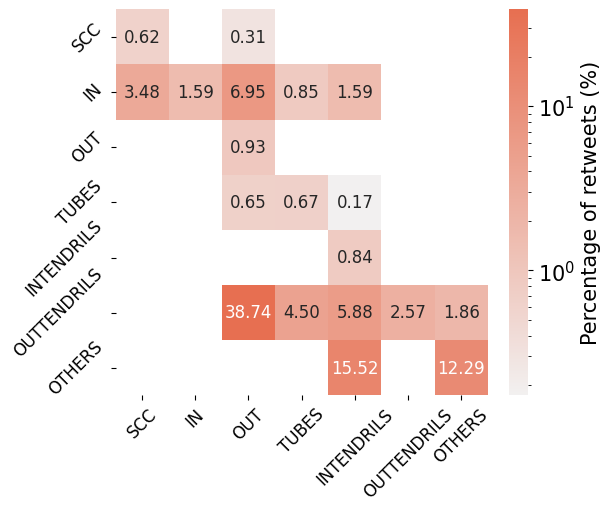

In [52]:
plot_weightPercent_matrix(fake_weightPercent_matrix1, color = colour_palette["fake"], save = "Figures/Fig3b1")

In [53]:
uncertain_bt_list1, uncertain_weightPercent_matrix1 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub1, edge_stance = 2)

Node numbers: 355795; Edge numbers: 781320; Weight numbers: 4265137.0
S  Number: 1679  Percentage: 0.47%
IN  Number: 50702  Percentage: 14.25%
OUT  Number: 5255  Percentage: 1.48%
TUBES  Number: 3525  Percentage: 0.99%
INTENDRILS  Number: 15687  Percentage: 4.41%
OUTTENDRILS  Number: 172977  Percentage: 48.62%
OTHERS  Number: 105970  Percentage: 29.78%
Weight count: 
[[  48228       0   43922       0       0       0       0]
 [ 336576   97937  904053   39887  198011       0       0]
 [      0       0   48977       0       0       0       0]
 [      0       0   40386   17876   12526       0       0]
 [      0       0       0       0   69184       0       0]
 [      0       0 1398311   53028  213611   48966   52242]
 [      0       0       0       0  351115       0  290301]]
Weight percentage: 
[[ 1.13  0.    1.03  0.    0.    0.    0.  ]
 [ 7.89  2.3  21.2   0.94  4.64  0.    0.  ]
 [ 0.    0.    1.15  0.    0.    0.    0.  ]
 [ 0.    0.    0.95  0.42  0.29  0.    0.  ]
 [ 0.    0.    0

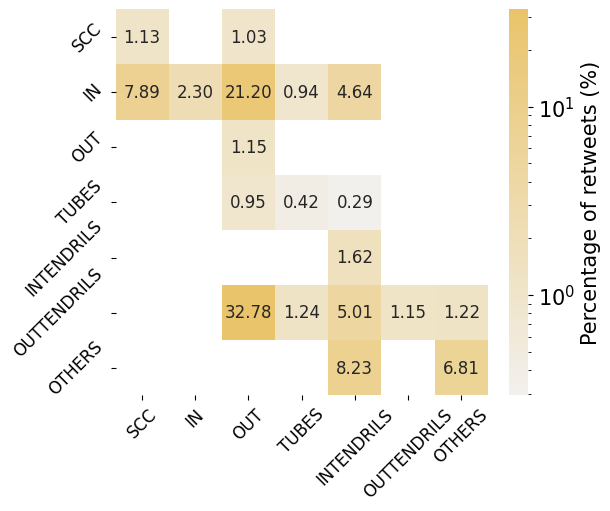

In [54]:
plot_weightPercent_matrix(uncertain_weightPercent_matrix1, color = colour_palette["uncertain"], save = "Figures/Fig3c1")

## 2.2.2. 5 months: 2021-11-17 to 2022-04-17

In [55]:
scientific_bt_list2, scientific_weightPercent_matrix2 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub2, edge_stance = 0)

Node numbers: 164427; Edge numbers: 349823; Weight numbers: 1567165.0
S  Number: 753  Percentage: 0.46%
IN  Number: 31025  Percentage: 18.87%
OUT  Number: 1786  Percentage: 1.09%
TUBES  Number: 1707  Percentage: 1.04%
INTENDRILS  Number: 8573  Percentage: 5.21%
OUTTENDRILS  Number: 70101  Percentage: 42.63%
OTHERS  Number: 50482  Percentage: 30.70%
Weight count: 
[[ 17217      0  14413      0      0      0      0]
 [101598 146758 186469  35426 167897      0      0]
 [     0      0  12316      0      0      0      0]
 [     0      0  11047   5356   3218      0      0]
 [     0      0      0      0  18103      0      0]
 [     0      0 433513  32929  81821  14040  13311]
 [     0      0      0      0 176955      0  94778]]
Weight percentage: 
[[ 1.1   0.    0.92  0.    0.    0.    0.  ]
 [ 6.48  9.36 11.9   2.26 10.71  0.    0.  ]
 [ 0.    0.    0.79  0.    0.    0.    0.  ]
 [ 0.    0.    0.7   0.34  0.21  0.    0.  ]
 [ 0.    0.    0.    0.    1.16  0.    0.  ]
 [ 0.    0.   27.66  2.1

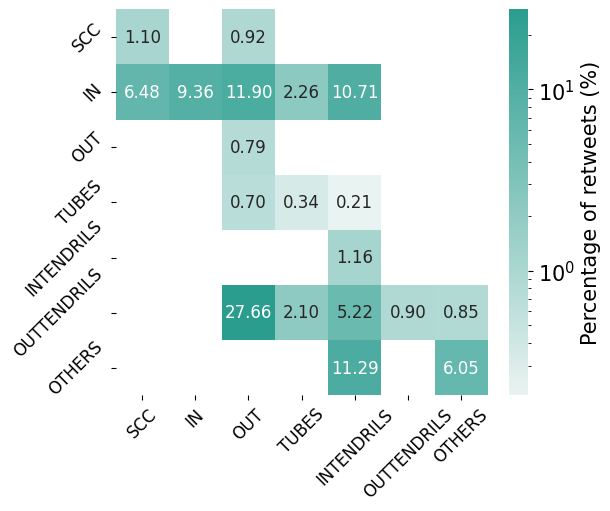

In [56]:
plot_weightPercent_matrix(scientific_weightPercent_matrix2, color = colour_palette["scientific"], save = "Figures/Fig3a2")

In [57]:
fake_bt_list2, fake_weightPercent_matrix2 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub2, edge_stance = 1)

Node numbers: 71259; Edge numbers: 120097; Weight numbers: 685835.0
S  Number: 71  Percentage: 0.10%
IN  Number: 958  Percentage: 1.34%
OUT  Number: 69  Percentage: 0.10%
TUBES  Number: 207  Percentage: 0.29%
INTENDRILS  Number: 654  Percentage: 0.92%
OUTTENDRILS  Number: 32970  Percentage: 46.27%
OTHERS  Number: 36330  Percentage: 50.98%
Weight count: 
[[  3012      0    481      0      0      0      0]
 [ 16474   1167   3582   1028   3733      0      0]
 [     0      0    787      0      0      0      0]
 [     0      0   1387   2319   1400      0      0]
 [     0      0      0      0   4406      0      0]
 [     0      0 193221  45818  82407  28507  35179]
 [     0      0      0      0 149493      0 111434]]
Weight percentage: 
[[ 0.44  0.    0.07  0.    0.    0.    0.  ]
 [ 2.4   0.17  0.52  0.15  0.54  0.    0.  ]
 [ 0.    0.    0.11  0.    0.    0.    0.  ]
 [ 0.    0.    0.2   0.34  0.2   0.    0.  ]
 [ 0.    0.    0.    0.    0.64  0.    0.  ]
 [ 0.    0.   28.17  6.68 12.02  4

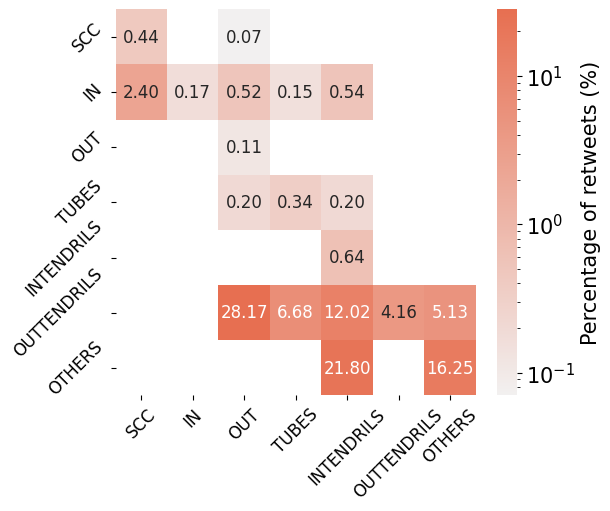

In [58]:
plot_weightPercent_matrix(fake_weightPercent_matrix2, color = colour_palette["fake"], save = "Figures/Fig3b2")

In [59]:
uncertain_bt_list2, uncertain_weightPercent_matrix2 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub2, edge_stance = 2)

Node numbers: 217758; Edge numbers: 460417; Weight numbers: 2138225.0
S  Number: 619  Percentage: 0.28%
IN  Number: 24124  Percentage: 11.08%
OUT  Number: 2819  Percentage: 1.29%
TUBES  Number: 1361  Percentage: 0.63%
INTENDRILS  Number: 5969  Percentage: 2.74%
OUTTENDRILS  Number: 107030  Percentage: 49.15%
OTHERS  Number: 75836  Percentage: 34.83%
Weight count: 
[[ 16103      0  11187      0      0      0      0]
 [180983  34467 298572  12494  57492      0      0]
 [     0      0  32627      0      0      0      0]
 [     0      0  11962   6981   4049      0      0]
 [     0      0      0      0  52307      0      0]
 [     0      0 731063  20446 124207  56231  93266]
 [     0      0      0      0 177840      0 215948]]
Weight percentage: 
[[ 0.75  0.    0.52  0.    0.    0.    0.  ]
 [ 8.46  1.61 13.96  0.58  2.69  0.    0.  ]
 [ 0.    0.    1.53  0.    0.    0.    0.  ]
 [ 0.    0.    0.56  0.33  0.19  0.    0.  ]
 [ 0.    0.    0.    0.    2.45  0.    0.  ]
 [ 0.    0.   34.19  0.

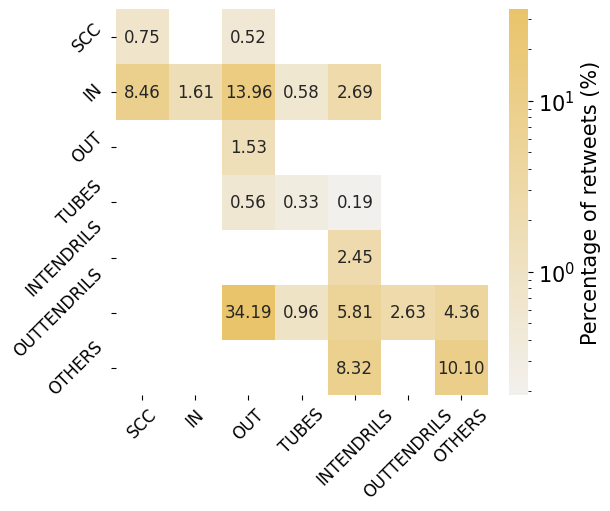

In [60]:
plot_weightPercent_matrix(uncertain_weightPercent_matrix2, color = colour_palette["uncertain"], save = "Figures/Fig3c2")

### 2.2.3. Temporal Variations Plot

In [61]:
def bt_listToDict(bt_list):
    
    bt_values = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
    
    d = {}
    for i in range(7):
        d.update(dict(zip(bt_list[i], [bt_values[i]]*len(bt_list[i]))))
    
    return d

In [62]:
def add_inactive_nodes(d, remaining_nodes_list):
    
    d.update(dict(zip(remaining_nodes_list, ['INACTIVE']*len(remaining_nodes_list))))

    return d

In [63]:
def results_convertToDF(bt_list1, bt_list2):
    
    bt_dict1 = bt_listToDict(bt_list1); bt_dict2 = bt_listToDict(bt_list2)
    
    bt_dict1 = add_inactive_nodes(bt_dict1, list(set(list(bt_dict2.keys())) - set(list(bt_dict1.keys()))))
    bt_dict2 = add_inactive_nodes(bt_dict2, list(set(list(bt_dict1.keys())) - set(list(bt_dict2.keys()))))
    
    cpd_dict = {}
    for k in list(bt_dict1.keys()):
        cpd_dict.update({k: [bt_dict1[k], bt_dict2[k]]})
        
    df = pd.DataFrame.from_dict(cpd_dict, orient='index')
    
    return df

In [64]:
def print_summary_info(df):
    
    persistent_active_count = np.sum(np.logical_and(df[0] != 'INACTIVE', df[1] != 'INACTIVE'))
    print("Persistently active nodes: ", (persistent_active_count, persistent_active_count/len(df)))
    
    consistent_count = np.sum(df[0] == df[1])
    print("Consistent BT roles among persistently active nodes: ", (consistent_count, consistent_count/persistent_active_count))
    

In [65]:
def filterInactive_df(df):
    
    return df[np.logical_and(df[0] != 'INACTIVE', df[1] != 'INACTIVE')]

In [66]:
def print_bt_percentage(df):
    
    bt_values_list = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
    
    print("1st timestamp:")
    for i in range(7):
        count = np.sum(df[0] == (bt_values_list[i]))
        print(bt_values_list[i], end = "  ")
        print("Number:", count, end = "  ")
        print("Percentage: {:.2f}%".format(count/len(df) * 100))
    
    print("==========")
    print("2nd timestamp:")
    for i in range(7):
        count = np.sum(df[1] == bt_values_list[i])
        print(bt_values_list[i], end = "  ")
        print("Number:", count, end = "  ")
        print("Percentage: {:.2f}%".format(count/len(df) * 100))

- scientific

In [67]:
scientific_bt_df = results_convertToDF(scientific_bt_list1, scientific_bt_list2)

In [68]:
print_summary_info(scientific_bt_df)

Persistently active nodes:  (103688, 0.325650198019491)
Consistent BT roles among persistently active nodes:  (61935, 0.5973208085795849)


In [69]:
active_scientific_bt_df = filterInactive_df(scientific_bt_df)

In [70]:
print_bt_percentage(active_scientific_bt_df)

1st timestamp:
SCC  Number: 1539  Percentage: 1.48%
IN  Number: 34861  Percentage: 33.62%
OUT  Number: 2773  Percentage: 2.67%
TUBES  Number: 2064  Percentage: 1.99%
INTENDRILS  Number: 5524  Percentage: 5.33%
OUTTENDRILS  Number: 45013  Percentage: 43.41%
OTHERS  Number: 11914  Percentage: 11.49%
2nd timestamp:
SCC  Number: 681  Percentage: 0.66%
IN  Number: 20537  Percentage: 19.81%
OUT  Number: 1522  Percentage: 1.47%
TUBES  Number: 1547  Percentage: 1.49%
INTENDRILS  Number: 5899  Percentage: 5.69%
OUTTENDRILS  Number: 49314  Percentage: 47.56%
OTHERS  Number: 24188  Percentage: 23.33%


In [71]:
from pysankey import sankey

 The following arguments are deprecated and should be removed: figureName in sankey()


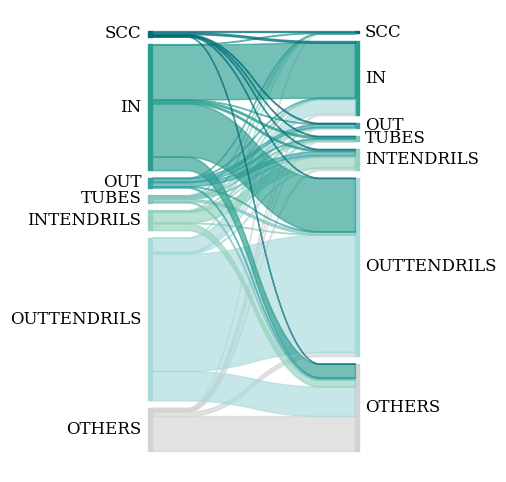

In [72]:
labels = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#006d77",
    "IN":"#2a9d8f",
    "OUT": "#38a3a5", 
    "TUBES": "#83c5be",
    "INTENDRILS": "#94d2bd",
    "OUTTENDRILS": "#a8dadc",
    "OTHERS": "lightgrey",
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    active_scientific_bt_df[0], active_scientific_bt_df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/Fig4a'
)

- fake

In [73]:
fake_bt_df = results_convertToDF(fake_bt_list1, fake_bt_list2)

In [74]:
print_summary_info(fake_bt_df)

Persistently active nodes:  (29850, 0.22677373527110287)
Consistent BT roles among persistently active nodes:  (19210, 0.6435510887772194)


In [75]:
active_fake_bt_df = filterInactive_df(fake_bt_df)

In [76]:
print_bt_percentage(active_fake_bt_df)

1st timestamp:
SCC  Number: 56  Percentage: 0.19%
IN  Number: 2225  Percentage: 7.45%
OUT  Number: 289  Percentage: 0.97%
TUBES  Number: 373  Percentage: 1.25%
INTENDRILS  Number: 588  Percentage: 1.97%
OUTTENDRILS  Number: 18278  Percentage: 61.23%
OTHERS  Number: 8041  Percentage: 26.94%
2nd timestamp:
SCC  Number: 33  Percentage: 0.11%
IN  Number: 461  Percentage: 1.54%
OUT  Number: 36  Percentage: 0.12%
TUBES  Number: 167  Percentage: 0.56%
INTENDRILS  Number: 372  Percentage: 1.25%
OUTTENDRILS  Number: 14482  Percentage: 48.52%
OTHERS  Number: 14299  Percentage: 47.90%


 The following arguments are deprecated and should be removed: figureName in sankey()


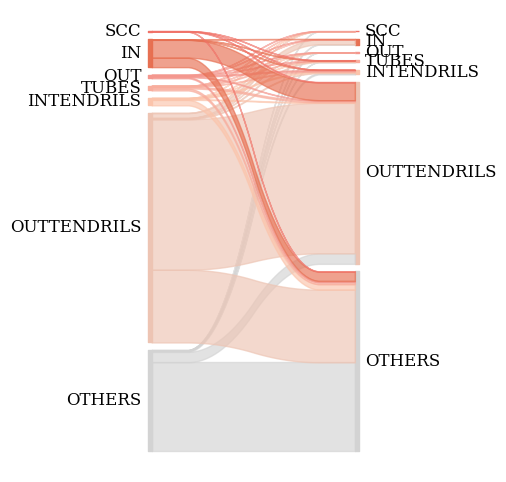

In [77]:
labels = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#f07167",
    "IN": "#e76f51",
    "OUT": "#f4978e",
    "TUBES": "#f8ad9d",
    "INTENDRILS": "#fbc4ab",
    "OUTTENDRILS": "#edc4b3",
    "OTHERS": "lightgrey",
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    active_fake_bt_df[0], active_fake_bt_df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/Fig4b'
)

- uncertain

In [78]:
uncertain_bt_df = results_convertToDF(uncertain_bt_list1, uncertain_bt_list2)

In [79]:
print_summary_info(uncertain_bt_df)

Persistently active nodes:  (136622, 0.3126855270054082)
Consistent BT roles among persistently active nodes:  (85763, 0.6277393099208034)


In [80]:
active_uncertain_bt_df = filterInactive_df(uncertain_bt_df)

In [81]:
print_bt_percentage(active_uncertain_bt_df)

1st timestamp:
SCC  Number: 1329  Percentage: 0.97%
IN  Number: 28341  Percentage: 20.74%
OUT  Number: 3599  Percentage: 2.63%
TUBES  Number: 2453  Percentage: 1.80%
INTENDRILS  Number: 7723  Percentage: 5.65%
OUTTENDRILS  Number: 63129  Percentage: 46.21%
OTHERS  Number: 30048  Percentage: 21.99%
2nd timestamp:
SCC  Number: 468  Percentage: 0.34%
IN  Number: 14657  Percentage: 10.73%
OUT  Number: 2232  Percentage: 1.63%
TUBES  Number: 1085  Percentage: 0.79%
INTENDRILS  Number: 3933  Percentage: 2.88%
OUTTENDRILS  Number: 67161  Percentage: 49.16%
OTHERS  Number: 47086  Percentage: 34.46%


 The following arguments are deprecated and should be removed: figureName in sankey()


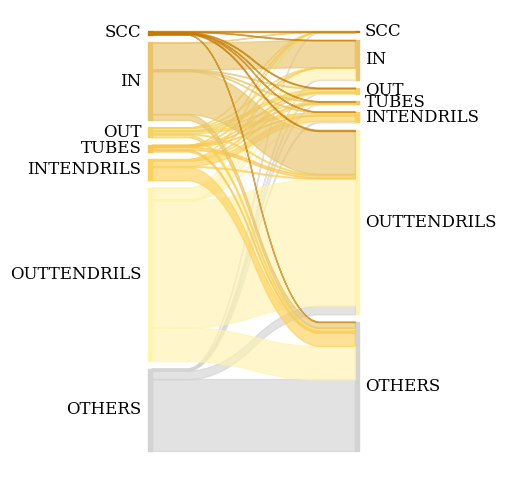

In [106]:
labels = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#C47900",
    "IN": "#e9c46a",
    "OUT": "#f4d35e",
    "TUBES": "#f9c74f",
    "INTENDRILS": "#FED15D",
    "OUTTENDRILS": "#fff3b0",
    "OTHERS": "lightgrey",
}

#colors = {
#    "SCC": "#763A12",
#    "IN": "#c78e3a",
#    "OUT": "#D49504",
#    "TUBES": "#e9c46a",
#    "INTENDRILS": "#f4d35e",
#    "OUTTENDRILS": "#FFE878",
#    "OTHERS": "lightgrey",
#}


fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    active_uncertain_bt_df[0], active_uncertain_bt_df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/Fig4c'
)